<a href="https://colab.research.google.com/github/AsraniSanjana/All_Codes/blob/main/All_Semester_Codes/ML_sem7/models/ML06_D17B1_multivariate_nonlinearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: SANJANA ASRANI

DIV: D17B

ROLL NO.: 01

ML LAB-06 PERFROM MULTIVARIATE NON-LINEAR REGRESSION

   X1  X2  Y1  Y2
0   1   2   3   2
1   2   3   8   5
2   3   4  11   6
3   4   5   8   5
4   5   6   3   2
5   6   7   0   1
6   7   8  -3   0
7   8   9  -4  -1
8   9  10  -3  -2
9  10  11   0  -3


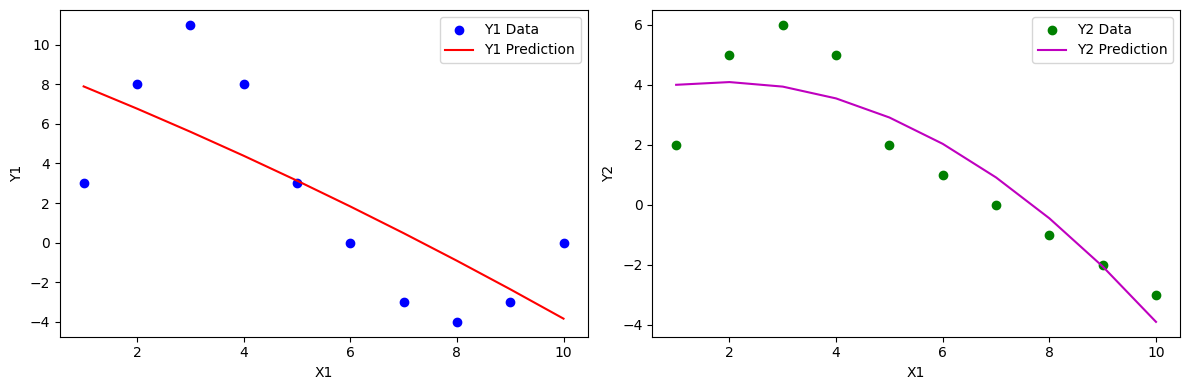

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline



# Expanded data points
X = np.array([
    [1, 2], [2, 3], [3, 4], [4, 5], [5, 6],
    [6, 7], [7, 8], [8, 9], [9, 10], [10, 11]
])

Y1 = np.array([3, 8, 11, 8, 3, 0, -3, -4, -3, 0])  # Nonlinear relationship for Y1
Y2 = np.array([2, 5, 6, 5, 2, 1, 0, -1, -2, -3])  # Nonlinear relationship for Y2


# Create a DataFrame to display the data points
data = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'Y1': Y1, 'Y2': Y2})

# Print the data in table format
print(data)

# Create polynomial regression models to capture non-linearity
degree = 2  # You can adjust this to make the regression more or less nonlinear
polyreg_Y1 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_Y2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the models
polyreg_Y1.fit(X, Y1)
polyreg_Y2.fit(X, Y2)

# Hardcoded test data for prediction
X_test = np.array([[6, 7], [7, 8], [8, 9]])

# Predict the values for the test data
Y1_pred = polyreg_Y1.predict(X_test)
Y2_pred = polyreg_Y2.predict(X_test)

# Visualize the data and regression results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], Y1, label='Y1 Data', color='b')
plt.plot(X[:, 0], polyreg_Y1.predict(X), label='Y1 Prediction', color='r')
plt.xlabel('X1')
plt.ylabel('Y1')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], Y2, label='Y2 Data', color='g')
plt.plot(X[:, 0], polyreg_Y2.predict(X), label='Y2 Prediction', color='m')
plt.xlabel('X1')
plt.ylabel('Y2')
plt.legend()

plt.tight_layout()
plt.show()


# **ASSESSMENT**

1. Multivariate nonlinear regression is a statistical method used to model the relationships between **multiple** independent variables and **many** dependent variables when the relationship is **nonlinear**. It is an extension of multivariate linear regression, which assumes that the relationship between the variables is linear.


2. In nonlinear regression, we use **nonlinear** functions to model the relationship between the independent variables and the dependent variable. These functions can take many forms, such as exponential, logarithmic, or power functions.


3. The goal of multivariate nonlinear regression is to find the values of the model parameters that best fit the data. This is done by minimizing the sum of the squared differences between the predicted values and the actual values.


4. Linear regression is a subset of polynomial regression, as linear regression is just polynomial regression in the first order


5. What kind of a model will fit the data and why?
cubic polynomial regression

Visual Inspection: Plotting the data in a scatter plot helps visually assess the relationship between "mileage" and "dry weight."

the relationship seems nonlinear (e.g., curved),thus trying various degree values and 3 fits the most.

Model Selection: The choice of the model should be guided by the nature of the relationship between the variables.

6. Is it multivariate/bivariate,  linear/ nonlinear model?

multivariate and nonlinear because

Multivariate: The model is multivariate because it involves more than one variable. In this case, you are using both "Mileage" and "Dry Weight" as variables. You are predicting "Dry Weight" based on the "Mileage" variable, so it's a multivariate regression.

Nonlinear: The model is nonlinear because you are using polynomial regression, specifically polynomial features of degree 3. Polynomial regression introduces nonlinear relationships between the predictor variable (Mileage) and the response variable (Dry Weight) by fitting a polynomial function to the data. In contrast, linear regression assumes a linear relationship between variables, which is not the case in this code



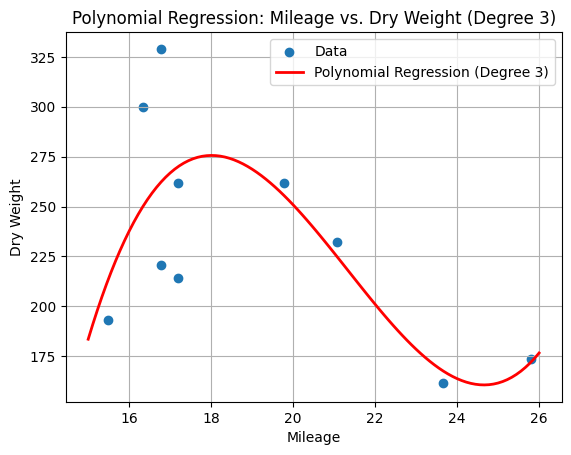

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data
mileage = np.array([16.77, 17.2, 21.07, 17.2, 16.34, 19.78, 15.48, 16.77, 23.65, 25.8])
dry_weight = np.array([220.5, 214.2, 232.2, 261.9, 299.7, 261.9, 193.05, 328.95, 161.55, 173.7])

# Reshape the data
mileage = mileage.reshape(-1, 1)  # Reshape to a column vector

degree = 3
poly_features = PolynomialFeatures(degree=degree)
mileage_poly = poly_features.fit_transform(mileage)

model = LinearRegression()
model.fit(mileage_poly, dry_weight)

mileage_range = np.linspace(15, 26, 100).reshape(-1, 1)  # Generate a range of mileage values
mileage_range_poly = poly_features.transform(mileage_range)
predicted_dry_weight = model.predict(mileage_range_poly)

# Visualize the data and the polynomial regression model
plt.scatter(mileage, dry_weight, label="Data")
plt.plot(mileage_range, predicted_dry_weight, color='red', linewidth=2, label=f"Polynomial Regression (Degree {degree})")
plt.xlabel("Mileage")
plt.ylabel("Dry Weight")
plt.title(f"Polynomial Regression: Mileage vs. Dry Weight (Degree {degree})")
plt.legend()
plt.grid(True)
plt.show()
